### Prop

In [1]:
from felpy.model.beamlines.exfel_spb.methods import get_beamline_object
from felpy.model.core.beamline import Beamline
from wpg.optical_elements import Drift, Aperture
from felpy.model.tools import propagation_parameters
from felpy.model.core.wavefront import Wavefront
from labwork.about import dCache
from wpg.wpg_uti_wf import plot_intensity_map as plt

In [2]:
def scale(wfr, nx = 512, ny = 512):
    """
    DEPR.
    narrow functionality for scaling a wavefront (ie the number of pixels)
    in the source plane

    :param wfr: wpg wfr strucutre
    :param isc: ideal scale
    :param ifov: ideal field of view

    :returns wfr: scaled wpg wfr structure
    """

    ix, iy = wfr.params.Mesh.nx, wfr.params.Mesh.ny
    dx, dy = wfr.params.Mesh.xMax-wfr.params.Mesh.xMin, wfr.params.Mesh.yMax-wfr.params.Mesh.yMin
    

    scbl = Beamline()
    #scbl.append(Drift(0), propagation_parameters(fx/dx, nx/ix, fy/dy, ny/iy))
    scbl.append(Aperture('r','a', 800e-06, 800e-06), propagation_parameters(800e-06/dy, nx/ix, 800e-06/dx, ny/iy))

    scbl.propagate(wfr)

    return wfr


In [3]:
from felpy.utils.job_utils import JobScheduler
from felpy.utils.os_utils import mkdir_p
import os

In [4]:
from felpy.utils.job_utils import JobScheduler
from felpy.utils.os_utils import mkdir_p
import os
from labwork.about import logs 

def propagation_batch_launcher(input_directory, sdir, focus, analysis = False, crop = [], append = [], VERBOSE = True, description = ""):
    """
    This part launches the jobs that run in main 
    """
    
    wfr_directory = input_directory

    mkdir_p(sdir)
    
    cwd = os.getcwd()
    script = "propagate_to_batch.py"
    
    js = JobScheduler(cwd + "/" + script, logDir = logs + "/",
                      jobName = "NVE_4.96keV", partition = 'exfel', nodes = 2, jobType = 'array',
                      jobArray = wfr_directory, options = [sdir, focus, analysis, crop, append, description])
    
    js.run(test = False)


In [5]:
launch(dCache + "/NanoKB-Pulse/source/", sdir = dCache + "NanoKB-Pulse/NVE/",
      focus = "nano", analysis = False, crop = ["d1", "NVE"])


Initialising Job Scheduler

Python File: /gpfs/exfel/data/user/guestt/FELpy/felpy/examples/propagation/NKB/propagate_to_batch.py
Global Job Name: NVE_4.96keV
# Nodes: 2
Partition: exfel
Job Type: array
Run Dir: /gpfs/exfel/data/user/guestt/FELpy/felpy/examples/propagation/NKB
Job Dir: /gpfs/exfel/data/user/guestt/labwork/logs//jobs/NVE_4.96keV/
Log Dir: /gpfs/exfel/data/user/guestt/labwork/logs//NVE_4.96keV/
Output Dir: /gpfs/exfel/data/user/guestt/labwork/logs//out/NVE_4.96keV/
Error Dir: /gpfs/exfel/data/user/guestt/labwork/logs//error/NVE_4.96keV/
Sending ALL Diagnostics To: trey.guest@desy.de
Script Options: ['/gpfs/exfel/data/user/guestt/dCache/NanoKB-Pulse/NVE/', 'nano', False, ['d1', 'NVE'], []]

Generating array Scripts

Submitting Jobs


### Propagate Nano Focus to NVE
Here we propagate to the exit-surface of the last optical element so that we can easilyt

In [ ]:
bl = get_beamline_object(ekev = 4.96, options = 'nano', crop = ['d1', 'NVE'])
#    #bl.propagation_options[0]['optical_elements'][-1].L += z
#    bl.propagation_options[0]['propagation_parameters'][-1] = propagation_parameters(s,1,s,1,mode = 'converge')

wdir = dCache + "NanoKB-Pulse/source/NanoKB-Pulse_2.h5" ### directory of FAST source .h5

wfr = Wavefront()
wfr.load_hdf5(wdir)
wfr.set_electric_field_representation('f')

wfr = scale(wfr,512,512)
bl.propagate(wfr)

plt(wfr)

Initialising Single Particle Beamline


In [ ]:
bl = get_beamline_object(ekev = 4.96, options = 'micron', crop = ['d1', 'MVP'])
#    #bl.propagation_options[0]['optical_elements'][-1].L += z
#    bl.propagation_options[0]['propagation_parameters'][-1] = propagation_parameters(s,1,s,1,mode = 'converge')

wdir = dCache + "NanoKB-Pulse/source/NanoKB-Pulse_2.h5" ### directory of FAST source .h5

wfr = Wavefront()
wfr.load_hdf5(wdir)
wfr.set_electric_field_representation('f')

wfr = scale(wfr,512,512)
bl.propagate(wfr)

plt(wfr)



Initialising Single Particle Beamline


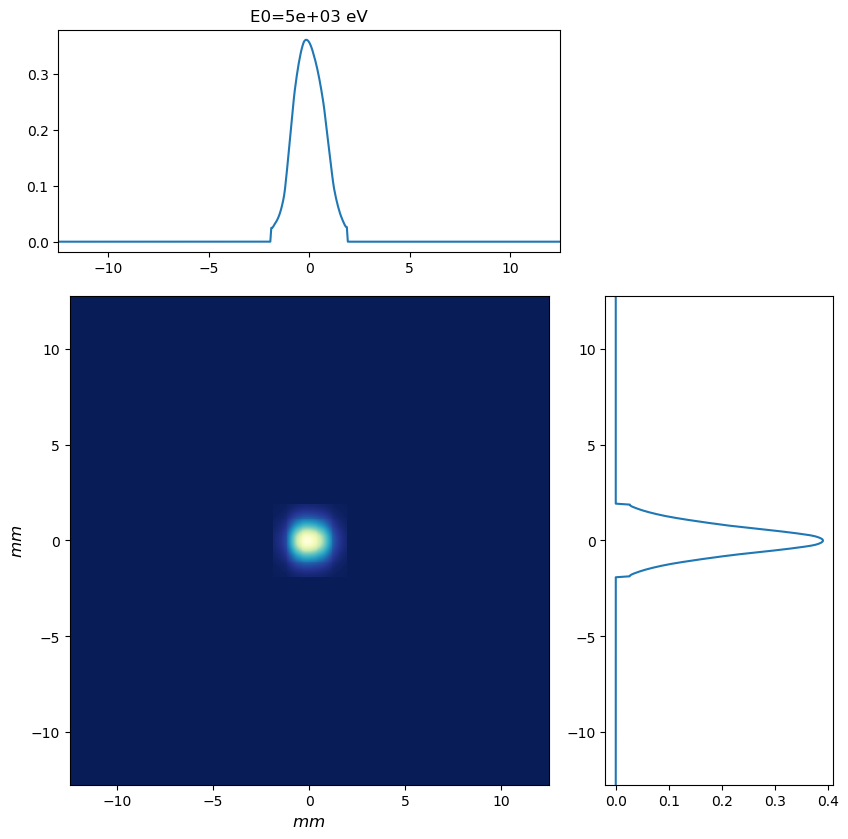

In [4]:
bl = get_beamline_object(ekev = 4.96, options = 'direct')
#    #bl.propagation_options[0]['optical_elements'][-1].L += z
#    bl.propagation_options[0]['propagation_parameters'][-1] = propagation_parameters(s,1,s,1,mode = 'converge')

wdir = dCache + "NanoKB-Pulse/source/NanoKB-Pulse_2.h5" ### directory of FAST source .h5

wfr = Wavefront()
wfr.load_hdf5(wdir)
wfr.set_electric_field_representation('f')

wfr = scale(wfr,512,512)
bl.propagate(wfr)

plt(wfr)


In [13]:
print([item for item in os.listdir(dCache + "/NanoKB-Pulse/source/")])

['NanoKB-Pulse_15.h5', 'NanoKB-Pulse_41.h5', 'NanoKB-Pulse_65.h5', 'NanoKB-Pulse_27.h5', 'NanoKB-Pulse_39.h5', 'NanoKB-Pulse_6.h5', 'NanoKB-Pulse_23.h5', 'NanoKB-Pulse_51.h5', 'NanoKB-Pulse_17.h5', 'NanoKB-Pulse_11.h5', 'NanoKB-Pulse_69.h5', 'NanoKB-Pulse_43.h5', 'NanoKB-Pulse_50.h5', 'NanoKB-Pulse_31.h5', 'NanoKB-Pulse_21.h5', 'NanoKB-Pulse_13.h5', 'NanoKB-Pulse_70.h5', 'NanoKB-Pulse_20.h5', 'NanoKB-Pulse_16.h5', 'NanoKB-Pulse_35.h5', 'NanoKB-Pulse_32.h5', 'NanoKB-Pulse_45.h5', 'NanoKB-Pulse_59.h5', 'NanoKB-Pulse_44.h5', 'NanoKB-Pulse_56.h5', 'NanoKB-Pulse_58.h5', 'NanoKB-Pulse_48.h5', 'NanoKB-Pulse_37.h5', 'NanoKB-Pulse_68.h5', 'NanoKB-Pulse_29.h5', 'NanoKB-Pulse_62.h5', 'NanoKB-Pulse_4.h5', 'NanoKB-Pulse_22.h5', 'NanoKB-Pulse_25.h5', 'NanoKB-Pulse_67.h5', 'NanoKB-Pulse_9.h5', 'NanoKB-Pulse_7.h5', 'NanoKB-Pulse_57.h5', 'NanoKB-Pulse_64.h5', 'NanoKB-Pulse_52.h5', 'NanoKB-Pulse_49.h5', 'NanoKB-Pulse_40.h5', 'NanoKB-Pulse_2.h5', 'NanoKB-Pulse_28.h5', 'NanoKB-Pulse_34.h5', 'NanoKB-Pulse_